In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def get_data(sheet_name):
  data = pd.read_excel('/content/drive/Shareddrives/CS505 Granger Causality Covid-19/impression_on_coronavirus.xlsx',sheet_name=sheet_name)
  data = data.values
  data = data[:,1:]
  score = np.linspace(1,int(data.shape[1]),int(data.shape[1]))[::-1]#compress impression into 1-D time series
  data = data.dot(score.T)[::-1]
  return normalization(data)
#compress multi-dimensional data to one-dimension
#https://news.gallup.com/poll/308222/coronavirus-pandemic.aspx
def normalization(data):
  #Normalization
  return (data-np.mean(data))/(np.std(data))

Text(0, 0.5, 'normalized score')

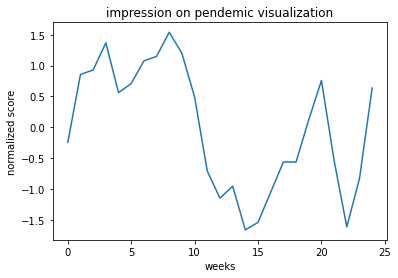

In [ ]:
#visualize impression on pendemic curve
import matplotlib.pyplot as plt
data = get_data('all_impression')
plt.plot(data)
plt.title('impression on pendemic visualization')
plt.xlabel('weeks')
plt.ylabel('normalized score')

In [ ]:
#visualize US news topic data
data = pd.read_excel('/content/drive/Shareddrives/CS505 Granger Causality Covid-19/Themes by Weeks.xlsx',sheet_name = 'US')
data = data.values
topics = data[1:-1,1]
news_topic = data[1:-1,3:]
news_topic[pd.isna(news_topic)]=0
for i in range(news_topic.shape[0]):
    if np.sum(news_topic[i,:])!=0:
        news_topic[i,:] = normalization(news_topic[i,:])

In [ ]:
news_topic

array([[-0.7267015832764177, -0.7267015832764177, -0.7267015832764177,
        ..., -0.20152306290704897, 0.16498778558877977,
        -0.7267015832764177],
       [3.2438206350588814, -0.7291734484239386, -0.7291734484239386,
        ..., 2.1574178041414616, 1.3007129462963605, 1.7540601770303907],
       [-1.5236052062755459, 1.6454808749282097, -1.5236052062755459,
        ..., 1.374688632392543, 0.25926492761865955, 0.5805784490505311],
       ...,
       [-0.28514178270369567, -0.28514178270369567, -0.28514178270369567,
        ..., -0.28514178270369567, -0.28514178270369567,
        -0.28514178270369567],
       [-0.2848536736164732, -0.2848536736164732, -0.2848536736164732,
        ..., -0.2848536736164732, -0.2848536736164732,
        -0.2848536736164732],
       [0.08506945993825009, -0.8754451486333196, 2.372117038367462, ...,
        -0.8754451486333196, -0.8754451486333196, -0.8754451486333196]],
      dtype=object)

Text(0, 0.5, 'propotion of the news topic')

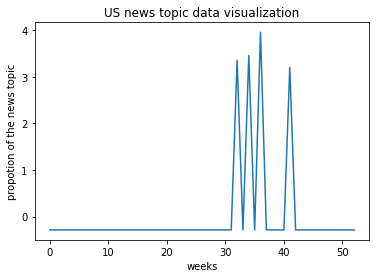

In [ ]:
for i in range(1):
  plt.plot(news_topic[19,:])
plt.title('US news topic data visualization')
plt.xlabel('weeks')
plt.ylabel('propotion of the news topic')
#plt.legend(topics)
#X axis is Weeks
#Y axis is proportion of all topics it has
#different colors of the line represents different 

> start analysing the correlation between impression and news_topic

In [ ]:
'''
def get_data(sheet_name):
  data = pd.read_excel('/content/drive/Shareddrives/cs 505 final project/impression_on_coronavirus.xlsx',sheet_name=sheet_name)
  data = data.values
  data = data[:,1:]
  score = np.linspace(1,int(data.shape[1]),int(data.shape[1]))[::-1]#compress impression into 1-D time series
  data = data.dot(score.T)[::-1]
  return normalization(data)
'''

## read five kind of impression data from the file
data = pd.read_excel('/content/drive/Shareddrives/CS505 Granger Causality Covid-19/impression_on_coronavirus.xlsx',sheet_name = None)
sheet_name = list(data.keys())
impression = get_data('impression')
worry_virus = get_data('worry get virus')
worry_financial = get_data('worry financial hardship')
isolate = get_data('isolate')
impression_economy = get_data('impression on economy')
impression_name = ['impression on pandemic', 'worry about getting virus','worry about financial hardship','isolation','impression on economy']
public_opinion = [impression,worry_virus,worry_financial,isolate,impression_economy]
## read news topic from file
data = pd.read_excel('/content/drive/Shareddrives/CS505 Granger Causality Covid-19/impression_on_coronavirus.xlsx',sheet_name='korea')
data = data.values
# extract news topics
topics = data[:-1,1]
# extract value
news_topic = data[:-1,3:].T
# fill the blank place in data with 0
news_topic[pd.isna(news_topic)]=0
for i in range(news_topic.shape[0]):
    if np.sum(news_topic[:,i])!=0:
        news_topic[:,i] = normalization(news_topic[:,i])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


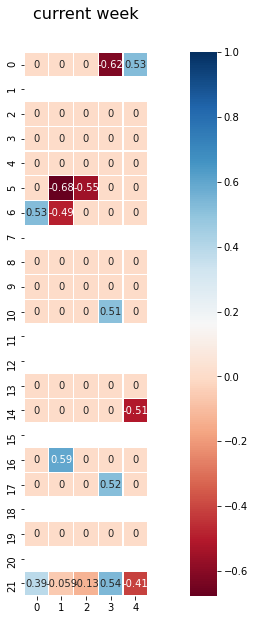

In [ ]:
correlation = np.zeros((4,5,22))
#cross correlation matrix
spearman = np.zeros((news_topic.shape[1],len(public_opinion)))
prob = np.zeros((news_topic.shape[1],len(public_opinion)))
for i in range(news_topic.shape[1]):
  for j in range(len(public_opinion)):
    r, p = stats.pearsonr(public_opinion[j], news_topic[:,i])
    spearman[i,j] = r
    prob[i,j] = p

# if probability < 0.05, it means the result is reasonable. set all values in spearman correlation matrix with prob>0.05 to Nan 
for i in range(21):
  for j in range(5):
    if prob[i,j]>0.05:
      spearman[i,j] = 0
correlation[0,:,:] = spearman.T
#plt.plot(impression/max(impression)*100)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'current week', y=1.05, size=16)
svm = sns.heatmap(spearman, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


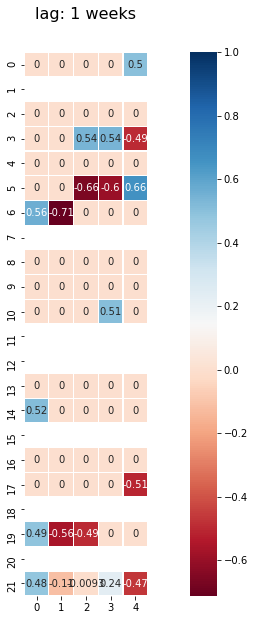

In [ ]:
#cross correlation matrix
spearman = np.zeros((news_topic.shape[1],len(public_opinion)))
prob = np.zeros((news_topic.shape[1],len(public_opinion)))
for i in range(news_topic.shape[1]):
  for j in range(len(public_opinion)):
    r, p = stats.spearmanr(public_opinion[j][1:], news_topic[:,i][:-1])
    spearman[i,j] = r
    prob[i,j] = p
    
for i in range(21):
  for j in range(5):
    if prob[i,j]>0.05:
      spearman[i,j] = 0
correlation[1,:,:] = spearman.T
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51
#plt.plot(impression/max(impression)*100)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'lag: 1 weeks', y=1.05, size=16)
svm = sns.heatmap(spearman, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


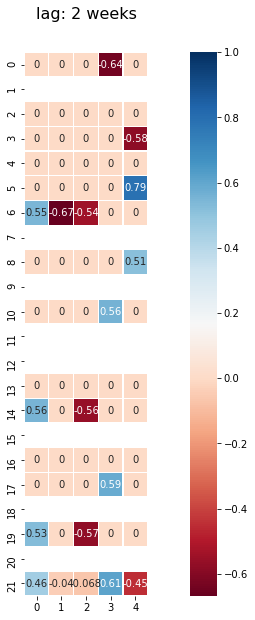

In [ ]:
#cross correlation matrix
spearman = np.zeros((news_topic.shape[1],len(public_opinion)))
prob = np.zeros((news_topic.shape[1],len(public_opinion)))
for i in range(news_topic.shape[1]):
  for j in range(len(public_opinion)):
    r, p = stats.spearmanr(public_opinion[j][2:], news_topic[:,i][:-2])
    spearman[i,j] = r
    prob[i,j] = p
    
for i in range(21):
  for j in range(5):
    if prob[i,j]>0.05:
      spearman[i,j] = 0
correlation[2,:,:] = spearman.T
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51
#plt.plot(impression/max(impression)*100)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'lag: 2 weeks', y=1.05, size=16)
svm = sns.heatmap(spearman,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


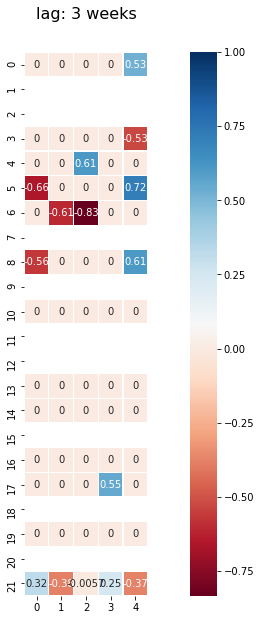

In [ ]:
#cross correlation matrix
spearman = np.zeros((news_topic.shape[1],len(public_opinion)))
prob = np.zeros((news_topic.shape[1],len(public_opinion)))
for i in range(news_topic.shape[1]):
  for j in range(len(public_opinion)):
    r, p = stats.spearmanr(public_opinion[j][3:], news_topic[:,i][:-3])
    spearman[i,j] = r
    prob[i,j] = p
    
for i in range(21):
  for j in range(5):
    if prob[i,j]>0.05:
      spearman[i,j] = 0
correlation[3,:,:] = spearman.T
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51
#plt.plot(impression/max(impression)*100)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'lag: 3 weeks', y=1.05, size=16)
svm = sns.heatmap(spearman,  linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

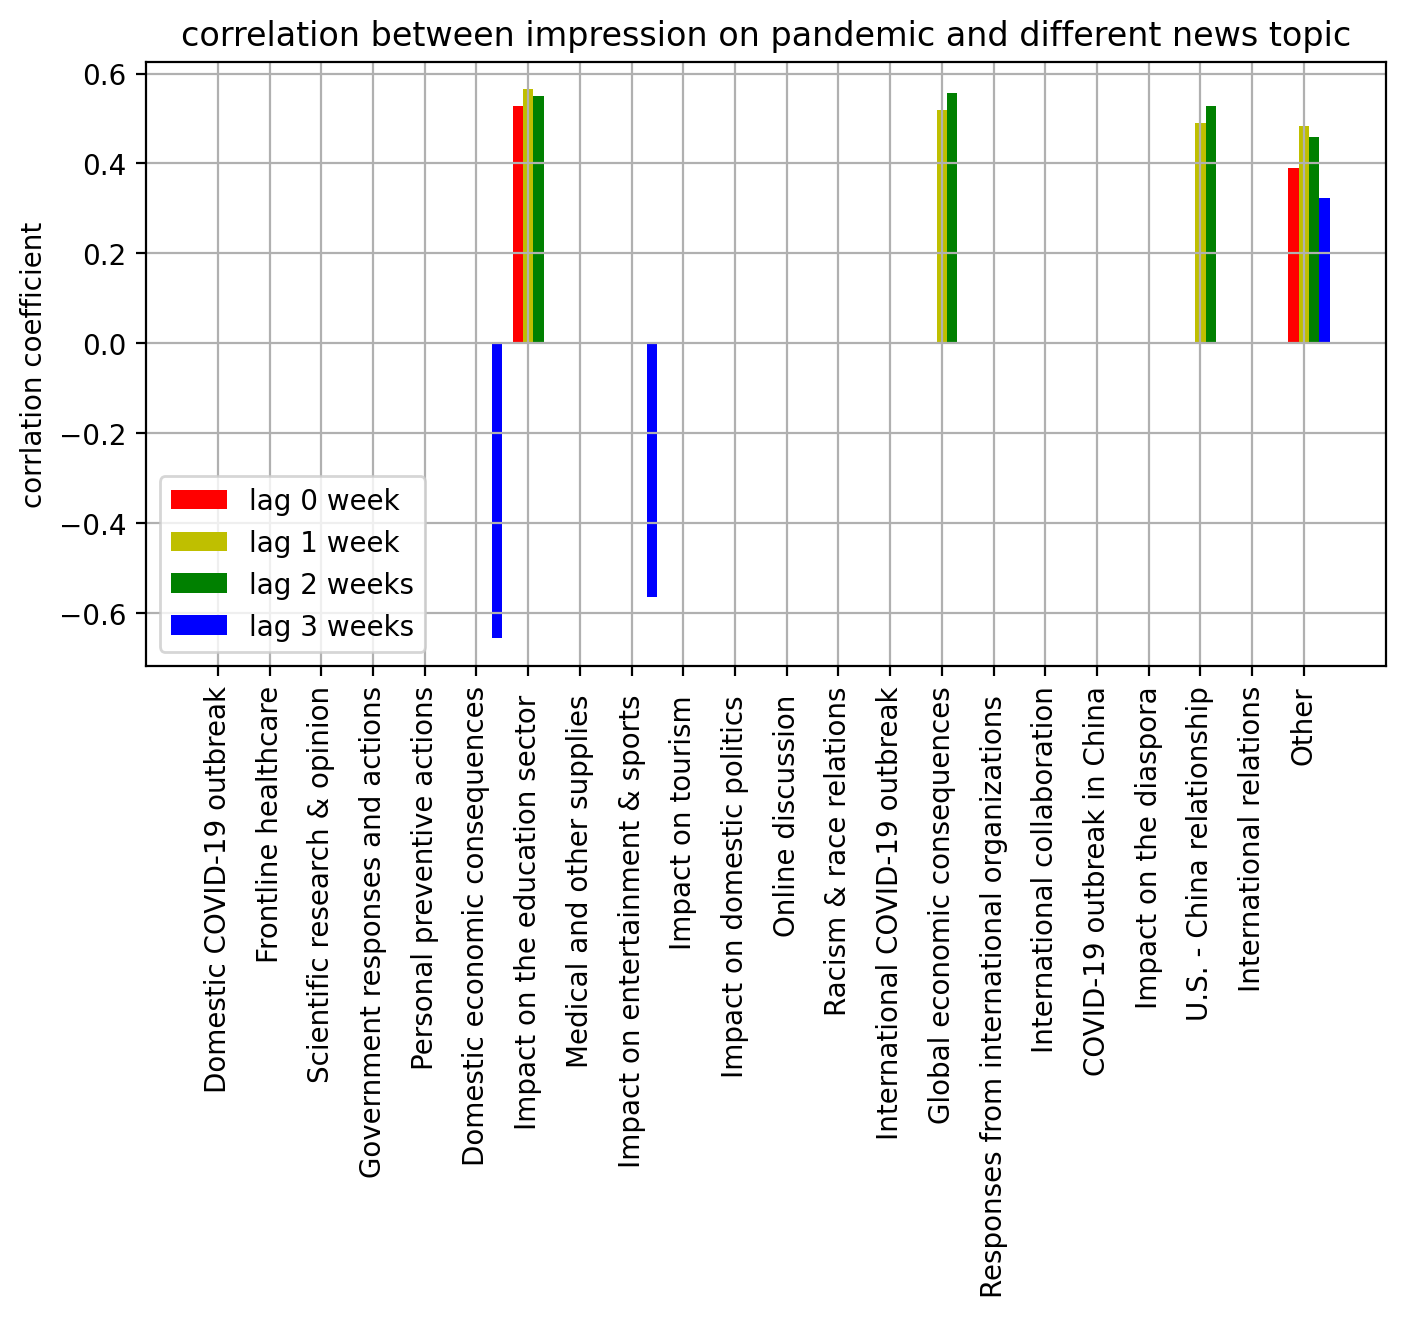

In [ ]:
import seaborn as sns
#result visulization (impression on pandemic)

plt.figure(dpi=200,figsize=(8,4))
name_list = topics
plt.grid('on')
# here is the only place need to be changed, 
impression_type = 0    # choose what type of impression you want to show.
plt.title('correlation between '+impression_name[impression_type]+' and different news topic')
y = np.squeeze(correlation[:,impression_type,:])   
x = list(range(y.shape[1]))
total_width, n = 0.4, 2
width = total_width / n

plt.xticks( rotation='vertical')
plt.ylabel('corrlation coefficient')
for i in range(len(x)):
    x[i] = x[i] - width
plt.bar(x, y[0,:], width=width, label='lag 0 week',fc = 'r')

for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, y[1,:], width=width, label='lag 1 week',tick_label = name_list,fc = 'y')

for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, y[2,:], width=width, label='lag 2 weeks',fc = 'g')

for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, y[3,:], width=width, label='lag 3 weeks',fc = 'b')
plt.legend()
plt.show()


['Impact on the education sector ' 'Global economic consequences'
 'U.S. - China relationship' 'Domestic economic consequences'
 'Impact on entertainment & sports ']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


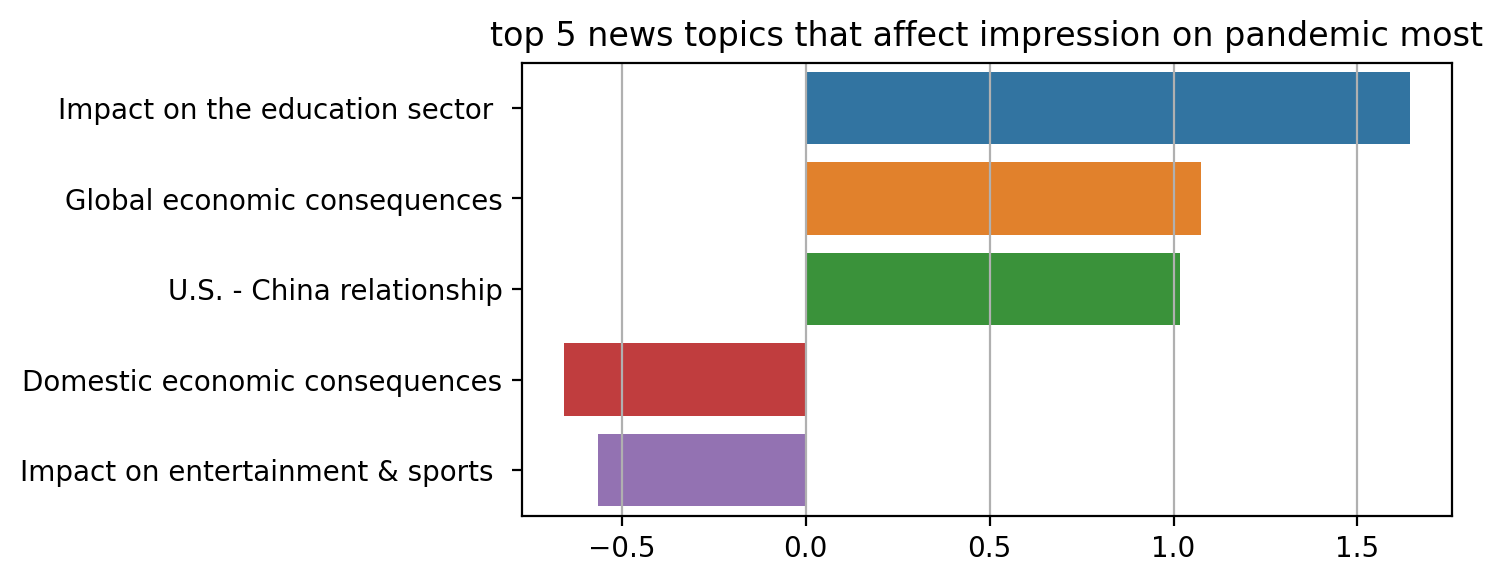

In [ ]:
# top 5 most correlated topics with the impression

plt.figure(dpi=200,figsize=(6,3))#### manipulate the size of the figure
plt.grid('on')
y = np.squeeze(correlation[:,impression_type,:])# choose the data of given impression type
y_sum = np.zeros_like(y[0,:])
for i in range(y.shape[0]):
    y_sum += y[i,:]
y_sum[np.isnan(y_sum)]=0
index = np.argsort(np.abs(y_sum[:-1]))[::-1]
index
print(topics[index[:5]])
x = np.array(x)
plt.title('top 5 news topics that affect '+impression_name[impression_type]+' most')
sns.barplot(y_sum[index[:5]],name_list[index[:5]])


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
# find the largest F test score with p<0.05.
# for example the output result below shows that the largest F test score result with p<0.05 is when lags equal to 1. which shows that impact on entertainment can be used to predict next week's impression on pandemic.
# you could just see the result of the news topics which have high correlation above.
np.set_printoptions(suppress=True)
max_lag = 4
cof_matrix = np.zeros((5,8))
for i in range(5):
    print('----------------------------------------------------')
    print('granger causality of : '+topics[index[i]])
    result = grangercausalitytests(np.array([public_opinion[0],news_topic[:,index[i]]]).T,max_lag,verbose=False)
    for j in range(max_lag):
        if result[j+1][0]['params_ftest'][1]<1:
            print('number of lags:',j+1)
            print('F test result: ', result[j+1][0]['params_ftest'][:2])
            cof_matrix[i,2*j:2*j+2] = np.array(result[j+1][0]['params_ftest'][:2])
    print('----------------------------------------------------')
print('F test coeffecient matrix: \n',cof_matrix)

----------------------------------------------------
granger causality of : Impact on entertainment & sports 
number of lags: 1
F test result:  (12.968667280401577, 0.002891568377949754)
number of lags: 2
F test result:  (2.3005840678308123, 0.14631728134154898)
number of lags: 3
F test result:  (2.0009557174936683, 0.1925167731603861)
number of lags: 4
F test result:  (1.4427959622117998, 0.3434699559722227)
----------------------------------------------------
----------------------------------------------------
granger causality of : Domestic economic consequences
number of lags: 1
F test result:  (0.7356252479021812, 0.4055099079291479)
number of lags: 2
F test result:  (4.87097031367449, 0.03054837695997245)
number of lags: 3
F test result:  (2.4654278984045446, 0.13678512167645362)
number of lags: 4
F test result:  (4.13752714439999, 0.07571426985710156)
----------------------------------------------------
----------------------------------------------------
granger causality of :

> Interpolation from Apr 6 to Jan 31. this part is not considered for now, since I think there is already enough to show in the presentation by far. after conclude all the previous result and we have more time we could consider it then.

In [ ]:
all_impression = get_data('all_impression')

data = pd.read_excel('/content/drive/Shareddrives/CS505 Granger Causality Covid-19/impression_on_coronavirus.xlsx',sheet_name='us2021')
data = data.values
topics = data[:-1,1]
news_topic = data[:-1,3:].T
news_topic[pd.isna(news_topic)]=0

Text(0.5, 1.0, '2020.Apr.6-12~2021.Jan.24-31')

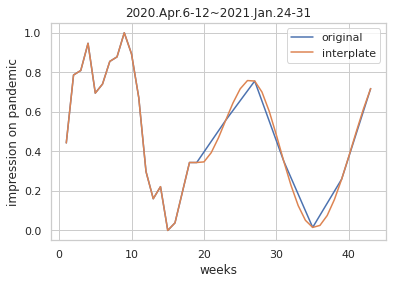

In [ ]:
from scipy import interpolate
x = [i for i in range(1,19)]
for i in range(19,43,4):
  x.extend([i])
x.append(43)
x_new = [i for i in range(1,44)]
f=interpolate.interp1d(x,all_impression,kind="cubic")
y_new = f(x_new)
plt.plot(x,all_impression)
plt.plot(x_new,y_new)
plt.ylabel('impression on pandemic')
plt.xlabel('weeks')

plt.legend(['original','interplate'])
plt.title('2020.Apr.6-12~2021.Jan.24-31')

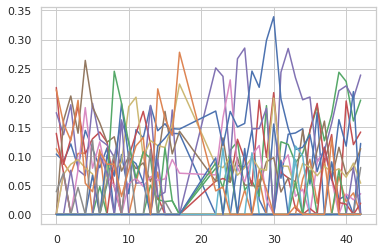

In [ ]:
news_topic.shape
x = [i for i in range(1,19)]+[i for i in range(23,44)]
x_new = [i for i in range(1,44)]
news_topic_interpolate = np.zeros((43,news_topic.shape[1]))
for i in range(news_topic.shape[1]):
  f=interpolate.interp1d(x,np.squeeze(news_topic[:,i]),kind="linear")
  news_topic_interpolate[:,i] = f(x_new)
  plt.plot(news_topic_interpolate[:,i])

In [ ]:

#cross correlation matrix
spearman = np.zeros((news_topic_interpolate.shape[1]))
prob = np.zeros((news_topic_interpolate.shape[1]))
for i in range(news_topic_interpolate.shape[1]):
  r, p = stats.spearmanr(y_new[30:], news_topic_interpolate[:,i][30:])
  spearman[i] = r
  prob[i] = p

for i in range(21):
  if prob[i]>0.05:
    spearman[i] = np.nan
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51
#plt.plot(impression/max(impression)*100)
print(spearman)

In [ ]:

np.array([news_topic[:,0],public_opinion[0]]).shape
news_topi = np.diff(news_topic_interpolate[:,0])[1:]
public_opinio = np.diff(y_new)[1:]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [ ]:
# importing China data

from google.colab import drive
drive.mount('/content/gdrive') 

#from google.colab import files

# uploaded = files.upload()

def normalization(data):
  #Normalization
  return (data-min(data))/(np.max(data)-np.min(data))
def get_data(sheet_name):
    data = pd.read_excel('/content/gdrive/Shareddrives/CS505 Granger Causality Covid-19/impression_on_coronavirus.xlsx',sheet_name=sheet_name)
    data = data.values
    data = data[:,1:]
    score = np.linspace(1,int(data.shape[1]),int(data.shape[1]))[::-1]#compress impression into 1-D time series
    data = data.dot(score.T)[::-1]
    return normalization(data)

## read five kind of impression data from the file
data = pd.read_excel('/content/gdrive/Shareddrives/CS505 Granger Causality Covid-19/impression_on_coronavirus.xlsx',sheet_name = None)
sheet_name = list(data.keys())
impression = get_data('impression')
worry_virus = get_data('worry get virus')
worry_financial = get_data('worry financial hardship')
isolate = get_data('isolate')
impression_economy = get_data('impression on economy')
impression_name = ['impression on pandemic', 'worry about getting virus','worry about financial hardship','isolation','impression on economy']
public_opinion = [impression,worry_virus,worry_financial,isolate,impression_economy]
## read news topic from file
data = pd.read_excel('/content/gdrive/Shareddrives/CS505 Granger Causality Covid-19/impression_on_coronavirus.xlsx',sheet_name='china')
data = data.values
# extract news topics
topics = data[:-1,1]
# extract value
news_topic = data[:-1,3:].T
# fill the blank place in data with 0
news_topic[pd.isna(news_topic)]=0

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# New Section

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


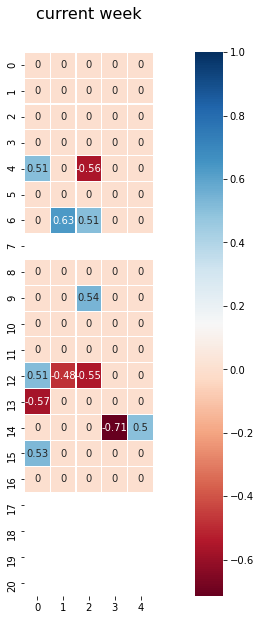

In [ ]:
correlation = np.zeros((4,5,21))
#cross correlation matrix
spearman = np.zeros((news_topic.shape[1],len(public_opinion)))
prob = np.zeros((news_topic.shape[1],len(public_opinion)))
for i in range(news_topic.shape[1]):
    for j in range(len(public_opinion)):
        r, p = stats.spearmanr(public_opinion[j], news_topic[:,i])
        spearman[i,j] = r
        prob[i,j] = p

# if probability < 0.05, it means the result is reasonable. set all values in spearman correlation matrix with prob>0.05 to Nan 
for i in range(21):
    for j in range(5):
        if prob[i,j]>0.05:
            spearman[i,j] = 0
correlation[0,:,:] = spearman.T
#plt.plot(impression/max(impression)*100)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'current week', y=1.05, size=16)
svm = sns.heatmap(spearman, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


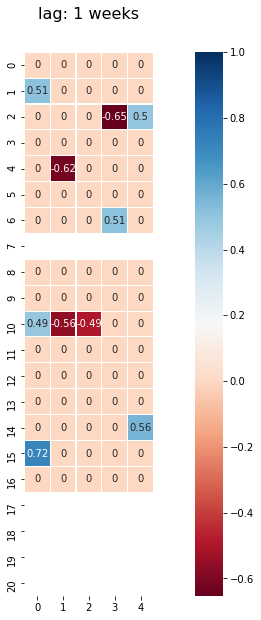

In [ ]:
#cross correlation matrix
spearman = np.zeros((news_topic.shape[1],len(public_opinion)))
prob = np.zeros((news_topic.shape[1],len(public_opinion)))
for i in range(news_topic.shape[1]):
    for j in range(len(public_opinion)):
        r, p = stats.spearmanr(public_opinion[j][1:], news_topic[:,i][:-1])
        spearman[i,j] = r
        prob[i,j] = p
    
for i in range(21):
    for j in range(5):
        if prob[i,j]>0.05:
            spearman[i,j] = 0
correlation[1,:,:] = spearman.T
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51
#plt.plot(impression/max(impression)*100)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'lag: 1 weeks', y=1.05, size=16)
svm = sns.heatmap(spearman, linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


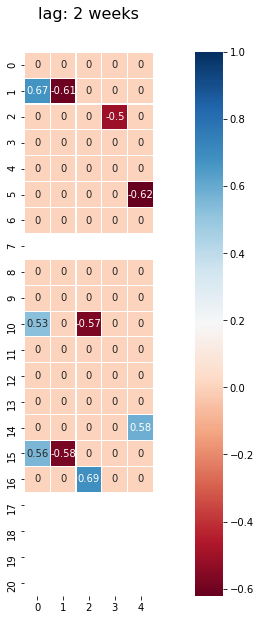

In [ ]:
#cross correlation matrix
spearman = np.zeros((news_topic.shape[1],len(public_opinion)))
prob = np.zeros((news_topic.shape[1],len(public_opinion)))
for i in range(news_topic.shape[1]):
    for j in range(len(public_opinion)):
        r, p = stats.spearmanr(public_opinion[j][2:], news_topic[:,i][:-2])
        spearman[i,j] = r
        prob[i,j] = p
    
for i in range(21):
    for j in range(5):
        if prob[i,j]>0.05:
            spearman[i,j] = 0
correlation[2,:,:] = spearman.T
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51
#plt.plot(impression/max(impression)*100)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'lag: 2 weeks', y=1.05, size=16)
svm = sns.heatmap(spearman,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


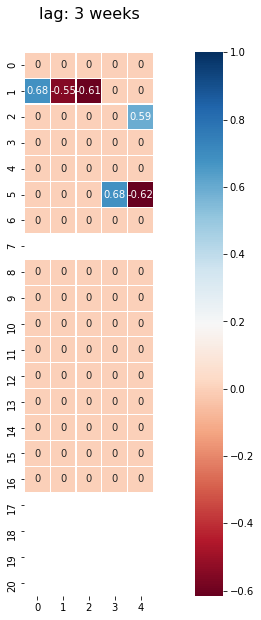

In [ ]:
#cross correlation matrix
spearman = np.zeros((news_topic.shape[1],len(public_opinion)))
prob = np.zeros((news_topic.shape[1],len(public_opinion)))
for i in range(news_topic.shape[1]):
    for j in range(len(public_opinion)):
        r, p = stats.spearmanr(public_opinion[j][3:], news_topic[:,i][:-3])
        spearman[i,j] = r
        prob[i,j] = p
    
for i in range(21):
    for j in range(5):
        if prob[i,j]>0.05:
            spearman[i,j] = 0
correlation[3,:,:] = spearman.T
# 输出：使用 Scipy 计算皮尔逊相关结果的 r 值：0.20587745135619354，以及 p-value：3.7902989479463397e-51
#plt.plot(impression/max(impression)*100)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'lag: 3 weeks', y=1.05, size=16)
svm = sns.heatmap(spearman,  linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

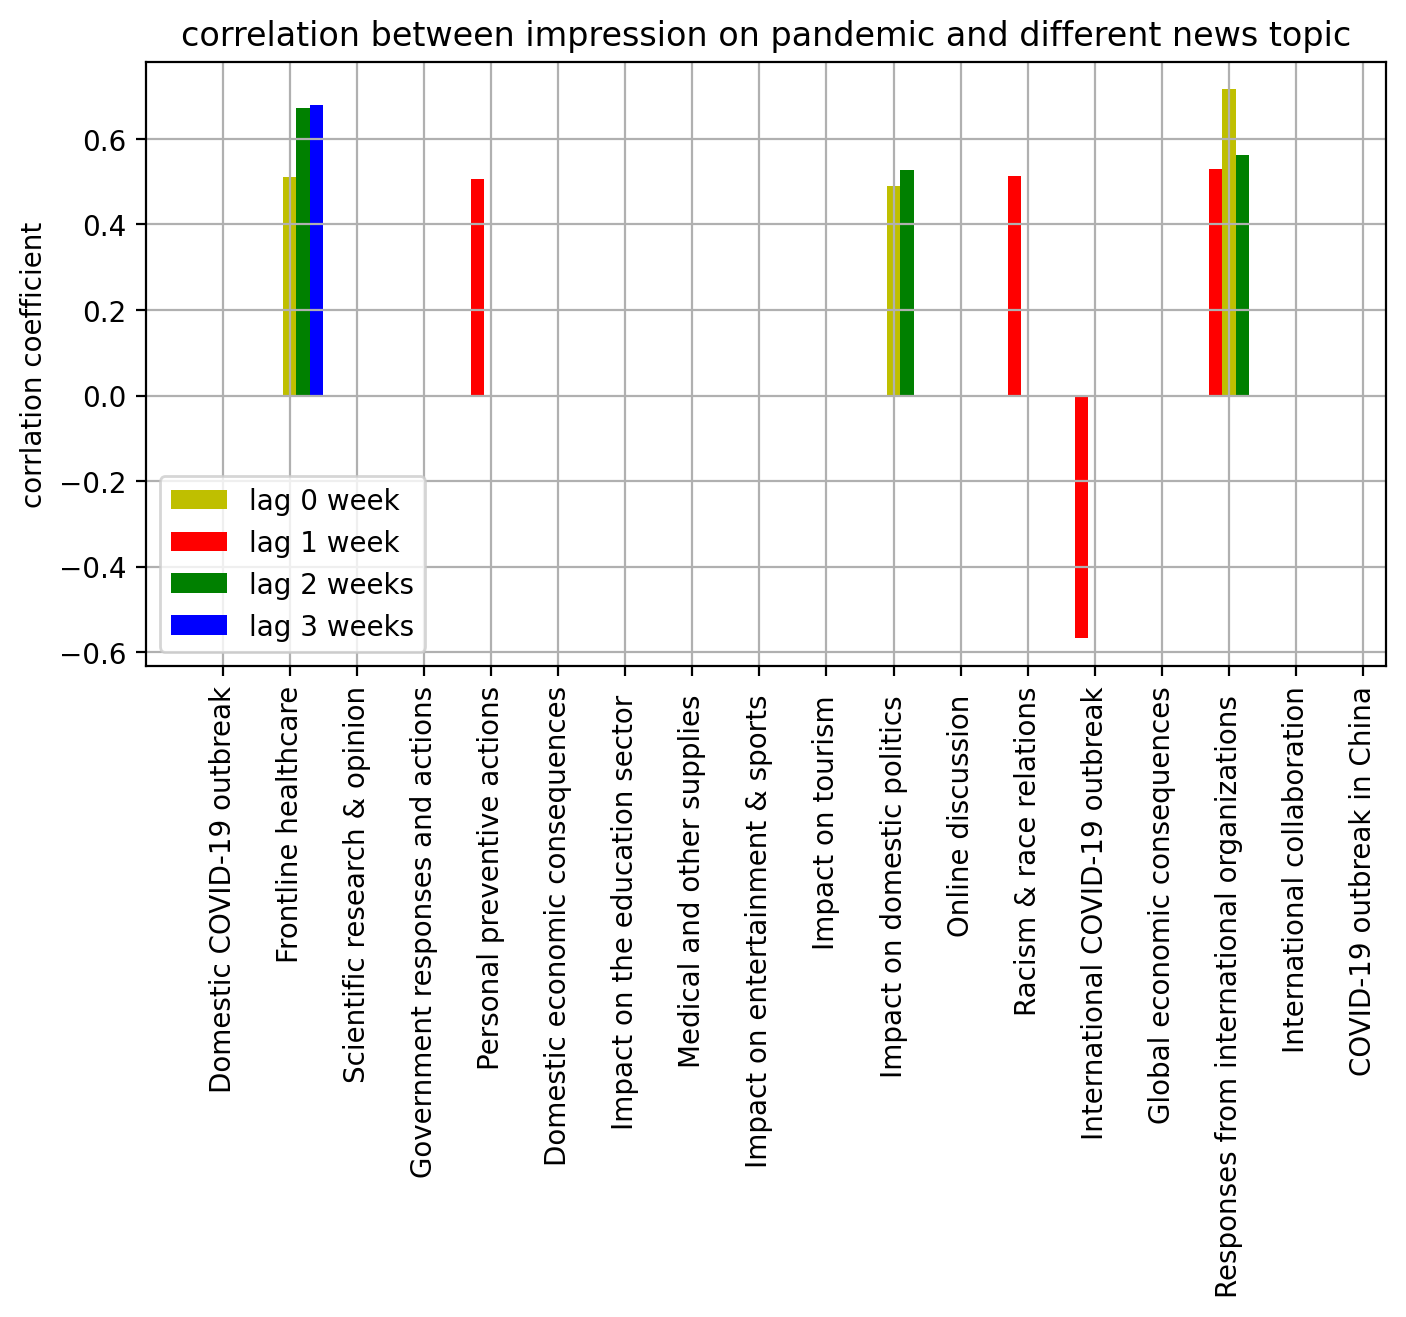

In [ ]:
#result visulization (impression on pandemic)
plt.figure(dpi=200,figsize=(8,4))
name_list = topics

# here is the only place need to be changed, 
impression_type = 0    # choose what type of impression you want to show.
plt.title('correlation between '+impression_name[impression_type]+' and different news topic')
y = np.squeeze(correlation[:,impression_type,:])   
x = list(range(y.shape[1]))
total_width, n = 0.4, 2
width = total_width / n
plt.grid('on') 
plt.bar(x, y[1,:], width=width, label='lag 0 week',tick_label = name_list,fc = 'y')

plt.xticks( rotation='vertical')
plt.ylabel('corrlation coefficient')
for i in range(len(x)):
    x[i] = x[i] - width
plt.bar(x, y[0,:], width=width, label='lag 1 week',fc = 'r')

for i in range(len(x)):
    x[i] = x[i] + 2*width
plt.bar(x, y[2,:], width=width, label='lag 2 weeks',fc = 'g')

for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, y[3,:], width=width, label='lag 3 weeks',fc = 'b')
plt.legend()
plt.show()

['Frontline healthcare' 'Responses from international organizations '
 'Impact on domestic politics ' 'International COVID-19 outbreak'
 'Racism & race relations']


Text(0, 0.5, 'total affection (sum of abs of correlation)')

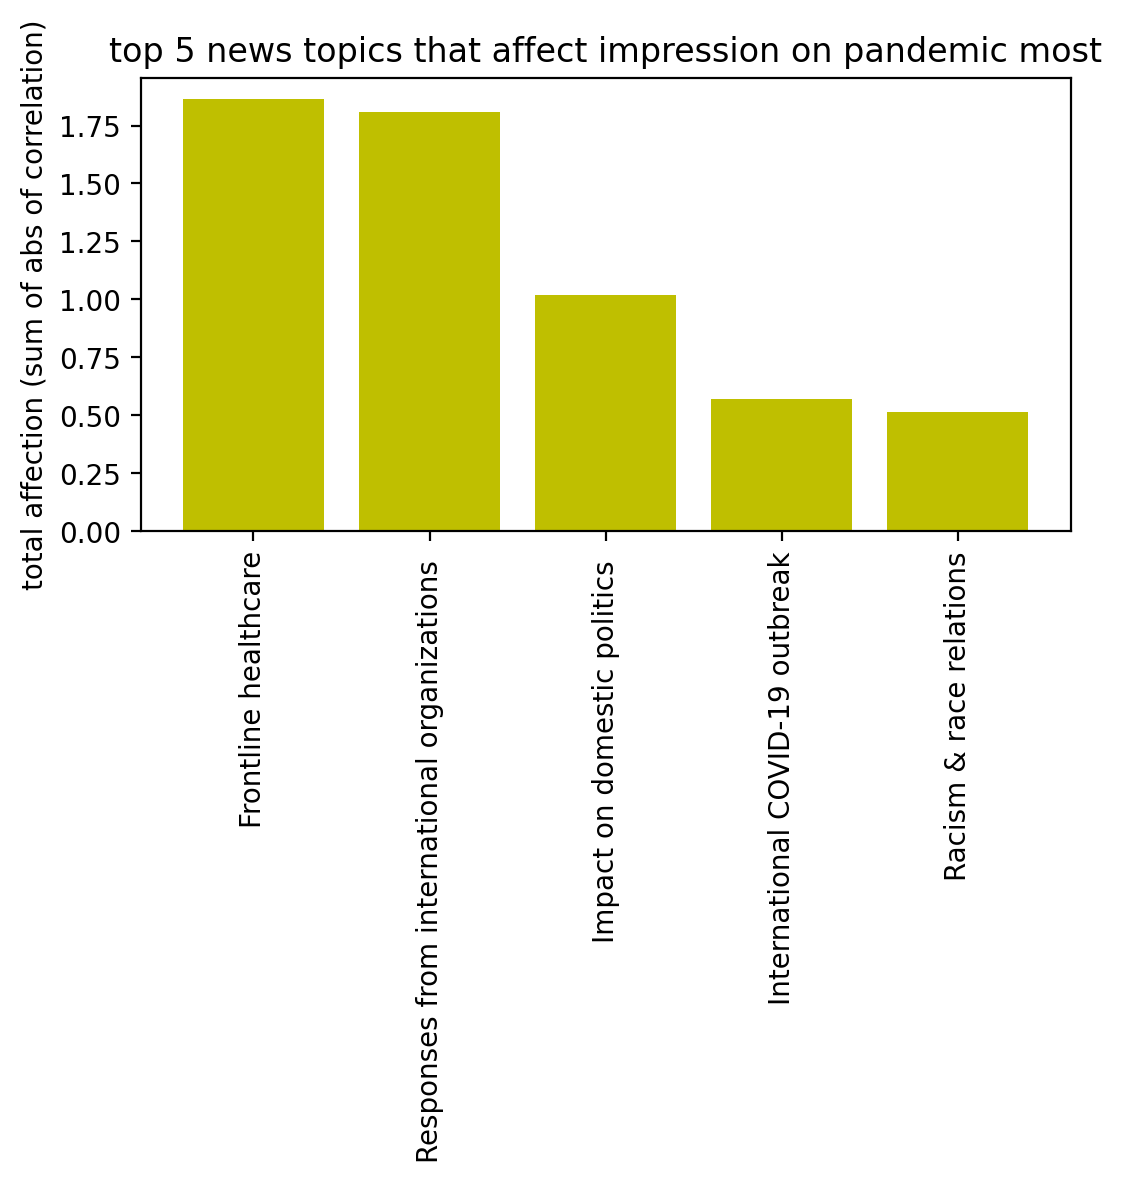

In [ ]:
# top 5 most correlated topics with the impression
plt.figure(dpi=200,figsize=(6,3))#### manipulate the size of the figure
y = np.squeeze(correlation[:,impression_type,:])# choose the data of given impression type
y_sum = np.zeros_like(y[0,:])
for i in range(y.shape[0]):
    y_sum += np.abs(y[i,:])
y_sum[np.isnan(y_sum)]=0
index = np.argsort(y_sum)[::-1]
print(topics[index[:5]])
x = np.array(x)
plt.title('top 5 news topics that affect '+impression_name[impression_type]+' most')
plt.bar(x[:5],y_sum[index[:5]],tick_label = name_list[index[:5]],fc = 'y')
plt.xticks( rotation='vertical')
plt.ylabel('total affection (sum of abs of correlation)')

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

result = grangercausalitytests(np.array([public_opinion[0],news_topic[:,12]]).T,5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7726  , p=0.3943  , df_denom=14, df_num=1
ssr based chi2 test:   chi2=0.9381  , p=0.3328  , df=1
likelihood ratio test: chi2=0.9131  , p=0.3393  , df=1
parameter F test:         F=0.7726  , p=0.3943  , df_denom=14, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9930  , p=0.1825  , df_denom=11, df_num=2
ssr based chi2 test:   chi2=5.7979  , p=0.0551  , df=2
likelihood ratio test: chi2=4.9476  , p=0.0843  , df=2
parameter F test:         F=1.9930  , p=0.1825  , df_denom=11, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8813  , p=0.2111  , df_denom=8, df_num=3
ssr based chi2 test:   chi2=10.5825 , p=0.0142  , df=3
likelihood ratio test: chi2=8.0079  , p=0.0458  , df=3
parameter F test:         F=1.8813  , p=0.2111  , df_denom=8, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9093  , p=0.5234  , df_den